## 第一题

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [91]:
Disney = [0.08088, 0.04737, -0.04634, 0.16834, -0.09082]
MacDonalds = [-0.01309, 0.15958, 0.09966, 0.03125, 0.06206]
Schlumberger = [-0.08463, 0.02884, 0.00165, 0.09571, -0.05723]
Haliburton = [-0.13373, 0.03616, 0.07919, 0.09227, -0.13242]

df = pd.DataFrame()
df['MacDonalds'] = MacDonalds
df['Schlumberger'] = Schlumberger
df['Haliburton'] = Haliburton

X = df
X = sm.add_constant(X)

df['Disney'] = Disney

Y = df['Disney']

model = sm.OLS(Y, X).fit()
model.summary()

d:\Apps\Anaconda\conda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Disney   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                 -0.481
Method:                 Least Squares   F-statistic:                    0.5670
Date:                Mon, 24 Mar 2025   Prob (F-statistic):              0.724
Time:                        20:19:40   Log-Likelihood:                 7.3124
No. Observations:                   5   AIC:                            -6.625
Df Residuals:                       1   BIC:                            -8.187
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0938      0.098      0.956      0.514      -1.153       1.341
MacDonalds      -0.8812      1.105     -0.798      0.571     -14.915      13.153
Schlumberger     1.3151      1.988      0.662      0.628     -23.941      26.572
Haliburton      -0.1717      1.344     -0.128      0.919     -17.252      16.908
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.057
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.514
Skew:                          -0.033   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
residuals = model.resid
std_resid = np.std(residuals, ddof=4)

print(f"残差的标准差为{std_resid}")
print("R^2为0.630")

残差的标准差为0.12534226903355988
R^2为0.630


In [93]:
df_1999 = pd.DataFrame ()
df_1999['MacDonalds']=[0.02604, 0.07851, 0.06732, -0.06483, -0.09029]
df_1999['Schlumberger']=[0.02695, 0.02362, 0.23938, 0.06127, -0.05773]
df_1999['Haliburton']=[0.00211, -0.04, 0.35526, 0.10714, -0.02933]

X_1999 = df_1999
X_1999 = sm.add_constant(X_1999)

Y_pred = model.predict(X_1999)
Y_1999 = [0.1, 0.06629, -0.11545, 0.02008, -0.08268]

error_pred = Y_1999 - Y_pred
std_resid_1999 = np.std(error_pred, ddof=0)

print(f"预测误差的标准差为{std_resid_1999}")

预测误差的标准差为0.14941031844493735


在上述回归中，各回归参数的拟合值是基于1998年的数据求得的，在对1998年数据的计算中，求得的y值为对1998年观察值的拟合，此时误差反映了观察值与拟合值间的差异，称作残差

在对1999年数据的计算中，y值是基于1998年的各参数拟合值求得的预测值，此时误差反映了1999年真实值与预测值间的差异

## 第二题
### 第一问

由于X和Y间的真实关系是线性的，（1）中的线性模型已经能良好反映X与Y间关系，（2）中添加的非线性项中并不会包含很多反映X与Y间关系的信息，所以两个RSS间不会存在显著差异，但由于（2）中有更多项来反映X与Y间信息（存在一定程度上的过拟合），（2）中RSS应比（1）中稍小些。

### 第二问

（2）中包含的非线性项使得模型产生一定的过拟合，对训练集有更好的拟合效果，但是由于X与Y呈线性关系，非线性项并不能使（2）中模型对测试集也有更好的拟合效果，所以（1）和（2）的RSS不存在显著差异。

### 第三问

当X和Y间真实关系并非线性，（2）中的非线性项能更好描述X与Y间真实关系，此时线性回归的训练RSS会显著大于三次回归的训练RSS。

### 第四问

虽然X与Y间真实关系为非线性，但非线性程度未知，如果关系为轻微非线性，线性回归模型可能更好反映其间真实关系；如果关系为明显的非线性，三次回归模型能更好描述非线性部分，所以两个测试RSS间的大小关系是不确定的。

### 第五问

若数据集呈现非线性关系，但X与Y间真实关系为线性，此时由于非线性回归模型在数据集上有更好的拟合效果，其训练RSS小于线性回归模型的训练RSS，但这并不意味着非线性模型更接近真实数据分布。同时，如第四问中回答所示，非线性关系程度也会影响线性与非线性回归模型间训练RSS的大小关系。测试RSS的大小在这种情况下能更好反映模型对数据真实关系的接近程度，所以此时测试RSS是评估模型泛化能力的更好指标。

## 第三题
### 第一问



In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed (2)
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = 0.5 * x1 + np.random.normal(0, 1, 100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0, 1, 100)

线性模型函数形式：$$y=2+2x_1+0.3x_2+\epsilon$$
$$\beta_0=2$$
$$\beta_1=2$$
$$\beta_2=0.3$$

### 第二问

In [95]:
r1 = np.corrcoef(x1, x2)
print(r1)
print("x1与x2间相关系数为0.81145744")

[[1.         0.81145744]
 [0.81145744 1.        ]]
x1与x2间相关系数为0.81145744


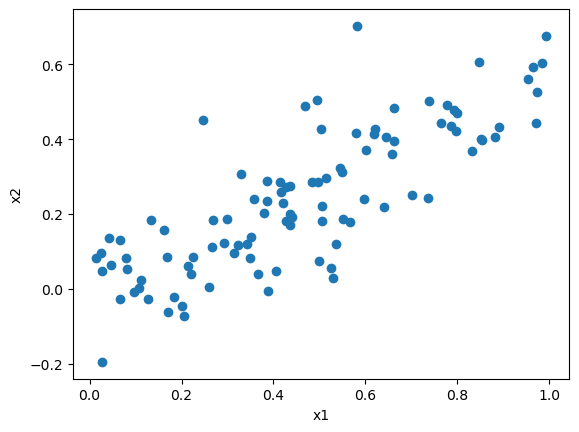

In [96]:
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 第三问

In [97]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X = sm.add_constant(df.drop(columns='y')) # 记得添加常数项
Y = df['y']

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     24.47
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.48e-09
Time:                        20:19:40   Log-Likelihood:                -137.23
No. Observations:                 100   AIC:                             280.5
Df Residuals:                      97   BIC:                             288.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7199      0.195      8.817      0.000       1.333       2.107
x1             1.8561      0.624      2.975      0.004       0.618       3.095
x2             1.1244      0.874      1.287      0.201      -0.610       2.859
==============================================================================
Omnibus:                        0.358   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.501
Skew:                          -0.120   Prob(JB):                        0.778
Kurtosis:                       2.749   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

根据上述信息，可得：
$$\hat{\beta_0}=1.7199$$
$$\hat{\beta_1}=1.8561$$
$$\hat{\beta_2}=1.1244$$

估计值与真实值相差较大，真实值为：
$$\beta_0=2$$
$$\beta_1=2$$
$$\beta_2=0.3$$

对x1,p值为0.004，对x2，p值为0.201,所以在95%的置信水平上拒绝$H_0:\beta_1=0$,认为$\beta_1$是个非零值，不能拒绝$H_0:\beta_2=0$

### 第四问

In [98]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X1 = sm.add_constant(df.drop(columns=['x2', 'y'])) # 记得添加常数项
Y = df['y']

model = sm.OLS(Y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     46.98
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           6.43e-10
Time:                        20:19:40   Log-Likelihood:                -138.08
No. Observations:                 100   AIC:                             280.2
Df Residuals:                      98   BIC:                             285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6908      0.194      8.698      0.000       1.305       2.077
x1             2.5078      0.366      6.854      0.000       1.782       3.234
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.341
Skew:                          -0.112   Prob(JB):                        0.843
Kurtosis:                       2.823   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

只用x1拟合，有
$$\hat{\beta_1}=2.5078$$
其对应p值为0.000 < 0.05，所以在95%的置信水平上拒绝零假设

### 第五问

In [99]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X2 = sm.add_constant(df.drop(columns=['x1', 'y'])) # 记得添加常数项
Y = df['y']

model = sm.OLS(Y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     37.12
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.18e-08
Time:                        20:19:40   Log-Likelihood:                -141.60
No. Observations:                 100   AIC:                             287.2
Df Residuals:                      98   BIC:                             292.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0661      0.163     12.702      0.000       1.743       2.389
x2             3.2334      0.531      6.093      0.000       2.180       4.286
==============================================================================
Omnibus:                        1.173   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.095
Skew:                          -0.093   Prob(JB):                        0.578
Kurtosis:                       2.522   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

只用x2拟合，有
$$\hat{\beta_2}=3.2334$$
其对应p值为0.000 < 0.05，所以在95%的置信水平上拒绝零假设

### 第六问

并不矛盾，当y单独在x1、x2上进行回归时，由于x1和x2都在一定程度上反映y与x间关系，它们对应的回归系数都不为零。但由于x1与x2间存在高共线性，当y同时在x1、x2上进行回归时，x1所反映的信息中已包含x2能反映的那部分信息（此题中x1能反映的信息更多），所以x1对应的回归系数不为零，x2对应的回归系数在一定置信水平上不能拒绝零假设。

### 第七问

In [100]:
np.random.seed (2)
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = 0.5 * x1 + np.random.normal(0, 1, 100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0, 1, 100)

x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

#### 拟合（3）

In [101]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X_new = sm.add_constant(df.drop(columns='y')) # 记得添加常数项
Y_new = df['y']

model = sm.OLS(Y_new, X_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     24.56
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.26e-09
Time:                        20:19:40   Log-Likelihood:                -141.72
No. Observations:                 101   AIC:                             289.4
Df Residuals:                      98   BIC:                             297.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8250      0.197      9.262      0.000       1.434       2.216
x1             0.9815      0.549      1.788      0.077      -0.108       2.071
x2             2.4472      0.744      3.289      0.001       0.971       3.924
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.745
Skew:                          -0.086   Prob(JB):                        0.689
Kurtosis:                       2.616   Cond. No.                         9.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

此时在95%置信区间上不可拒绝零假设$H_0:\beta_1=0$，可拒绝零假设$H_0:\beta_2=0$

#### 拟合（4）

In [102]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X1_new = sm.add_constant(df.drop(columns=['x2', 'y'])) # 记得添加常数项
Y_new = df['y']

model = sm.OLS(Y_new, X1_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     34.85
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           5.01e-08
Time:                        20:19:40   Log-Likelihood:                -147.01
No. Observations:                 101   AIC:                             298.0
Df Residuals:                      99   BIC:                             303.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8228      0.207      8.824      0.000       1.413       2.233
x1             2.3066      0.391      5.903      0.000       1.531       3.082
==============================================================================
Omnibus:                        7.060   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                8.216
Skew:                           0.383   Prob(JB):                       0.0164
Kurtosis:                       4.169   Cond. No.                         4.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

此时在95%置信区间上拒绝零假设

#### 拟合（5）

In [103]:
df = pd.DataFrame(list(zip(x1, x2, y)), columns=['x1', 'x2', 'y'])
X2_new = sm.add_constant(df.drop(columns=['x1', 'y'])) # 记得添加常数项
Y_mew = df['y']

model = sm.OLS(Y_mew, X2_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     44.93
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.27e-09
Time:                        20:19:40   Log-Likelihood:                -143.35
No. Observations:                 101   AIC:                             290.7
Df Residuals:                      99   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0325      0.161     12.622      0.000       1.713       2.352
x2             3.4241      0.511      6.703      0.000       2.410       4.438
==============================================================================
Omnibus:                        1.686   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.431
Skew:                          -0.132   Prob(JB):                        0.489
Kurtosis:                       2.480   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

此时在95%置信区间上拒绝零假设

根据上述重新拟合线性模型（3）-（5）所得结果，可知不准确观测点的加入使得各回归系数拟合值发生明显变化，$\beta_1$的拟合值显著减小，$\beta_2$的拟合值显著增大，这说明不准确观测点的加入使得x1对y的影响降低，x2对y的影响升高。